   #                Data Mining
     
   ###                     
   ##                December 04, 2015

# Regression Analysis
Prediction is similar to classification but models continuous/Numerical/Orderd valued

#### About  
In this notebook, we download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, Evaluate our model using test set, and finally use model to predict unknown value

### Importing Needed packages

Statsmodels is a Python module that allows users to explore data, estimate statistical models, and perform statistical tests.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

#  Understanding the Data

###  FuelConsumption.csv:

We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

#### Data Source : [Data Source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

* **MODELYEAR** e.g. 2014

* **MAKE** e.g. Acura

* **MODEL** e.g. ILX

* **VEHICLE CLASS** e.g. SUV

* **ENGINE SIZE** e.g. 4.7

* **CYLINDERS** e.g 6

* **TRANSMISSION** e.g. A6

* **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9

* **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9

* **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2

* **CO2 EMISSIONS (g/km)** e.g. 182 --> low --> 0

### Reading the data 

In [4]:
df = pd.read_csv("E:/Data Collection/FuelConsumption.csv")

# take a look at the dataset
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


###  Data Exploration

In [5]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
# Check the shape of the data ( rows, columns)
df.shape

(1067, 13)

In [10]:
# check the column names
df.columns


Index([u'MODELYEAR', u'MAKE', u'MODEL', u'VEHICLECLASS', u'ENGINESIZE',
       u'CYLINDERS', u'TRANSMISSION', u'FUELTYPE', u'FUELCONSUMPTION_CITY',
       u'FUELCONSUMPTION_HWY', u'FUELCONSUMPTION_COMB',
       u'FUELCONSUMPTION_COMB_MPG', u'CO2EMISSIONS'],
      dtype='object')

In [13]:
# Create  new data frame CDF AND VIZ from existing dataframe
# New dataframe contains selected columns from old dataframe
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [17]:
# creatre data frame VIZ with selected columns from existing cdf dataframe
viz= cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist


<bound method DataFrame.hist_frame of       CYLINDERS  ENGINESIZE  CO2EMISSIONS  FUELCONSUMPTION_COMB
0             4         2.0           196                   8.5
1             4         2.4           221                   9.6
2             4         1.5           136                   5.9
3             6         3.5           255                  11.1
4             6         3.5           244                  10.6
5             6         3.5           230                  10.0
6             6         3.5           232                  10.1
7             6         3.7           255                  11.1
8             6         3.7           267                  11.6
9             4         2.4           212                   9.2
10            4         2.4           225                   9.8
11            6         3.5           239                  10.4
12           12         5.9           359                  15.6
13           12         5.9           359                  15.6
14

In [18]:
plt.show()

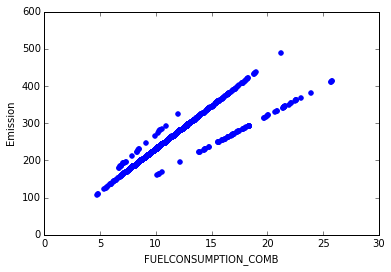

In [20]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

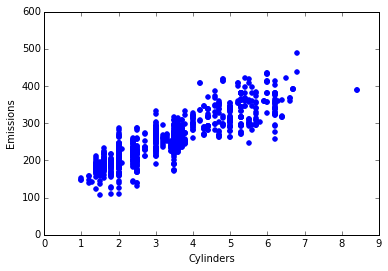

In [21]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color ='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emissions")
plt.show()

###  Creating train and test dataset

In [22]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

##  Simple Regression Model

##  What about linear regression?
LinearRegression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the independed x in the dataset, and the dependend y by the linear approximation.

###  Train data distribution

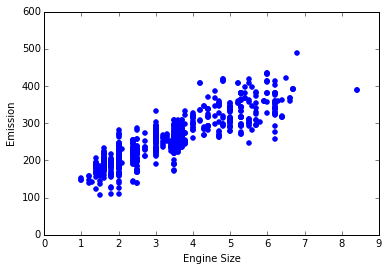

In [24]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

### Modeling

**Using sklearn package to model data**

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

# The coefficients

print 'Coefficients : ',regr.coef_
print 'Intercept : ',regr.intercept_

Coefficients :  [[ 39.27697637]]
Intercept :  [ 124.56901114]


### Plot Outputs

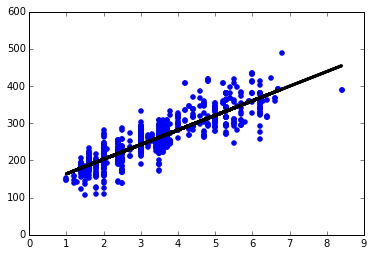

In [26]:
train_y_ = regr.predict(train_x)
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color ='blue')
plt.plot(train_x, train_y_, color='black', linewidth =3)

###  Evaluation

**Evaluate the model with the Test data**

In [28]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print ("Residual Sum of Squares : %.2f"
      % np.mean((test_y_ - test_y)**2))

# Explained variance score : 1 is perfect prediction

print('Variance Score : %.2f' % regr.score(test_x,test_y))



Residual Sum of Squares : 850.65
Variance Score : 0.76


### Plot Outputs

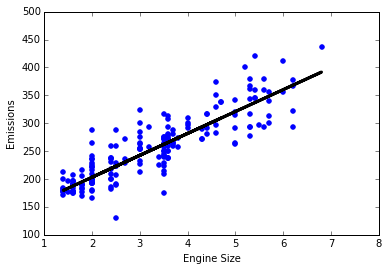

In [29]:
plt.scatter(test_x,test_y, color ='blue')
plt.plot(test_x, test_y_, color ='black', linewidth =3)
plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.show()

## Non-linear regression

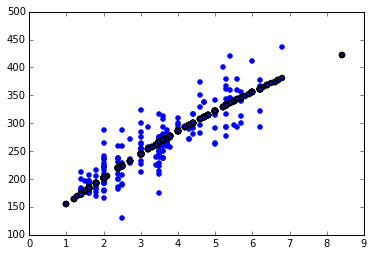

In [30]:
# Import necessary packages
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2),Ridge())
model.fit(train_x,train_y)
train_y_ = model.predict(train_x)
plt.scatter(test_x,test_y, color = 'blue')
plt.scatter(train_x,train_y_,linewidth = 2)

## Multiple Regression Model

In [33]:
# Import necessary packages

from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)

#  The Coefficients

print 'Coefficients : ',regr.coef_

Coefficients :  [[ 10.37394647   7.66252612   9.95341616]]


In [34]:
y_=regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual Sum of Squares : %.2f"
     %np.mean((y_ -y)**2))

#Explained Variance Score : 1 is perfect prediction

print('Variance Score : %.2f' % regr.score(x,y))

Residual Sum of Squares : 559.37
Variance Score : 0.84
